---
# ANÁLISE DE DADOS:
### ENEM 2019

---

**Pacotes necessários**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**Importar dados de interesse**

**Dados ENEM 2019 e dicionário com descrição de informações de interesse**

Fonte: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [2]:
deletar = ['NU_ANO','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2',
           'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','TX_RESPOSTAS_CN', 
           'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN',
           'TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','Q003','Q004','Q005',
           'Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016',
           'Q017','Q018','Q019','Q020', 'Q021','Q022','Q023','Q024','NO_MUNICIPIO_ESC',
           'CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC',
           'TP_SIT_FUNC_ESC','IN_TREINEIRO','CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC',
           'CO_PROVA_MT','TP_ENSINO','TP_ANO_CONCLUIU']

In [3]:
df = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding='latin-1')
df.drop(deletar, axis=1, inplace=True)
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025
0,190001595656,13,M,1,3,1,1,1,NaN,3552205,...,NaN,NaN,NaN,NaN,0,NaN,B,B,A,B
1,190001421546,8,M,1,1,1,1,1,NaN,2910800,...,NaN,NaN,NaN,NaN,0,NaN,C,E,C,B
2,190001133210,13,F,1,3,1,1,1,NaN,2304400,...,NaN,NaN,NaN,NaN,1,NaN,E,E,B,B
3,190001199383,10,F,1,1,1,1,1,NaN,1721000,...,483.8,503.6,537.3,392.0,1,460.0,C,E,E,B
4,190001237802,7,F,1,1,1,1,1,NaN,3118601,...,513.6,575.5,570.7,677.0,0,860.0,E,E,G,B


In [4]:
df.shape

(5095171, 27)

In [5]:
df.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
       'CO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q006', 'Q025'],
      dtype='object')

In [6]:
dicionario = pd.read_excel('dicionario.xlsx')
dicionario.head(2)

,TP_FAIXA_ETARIA,TP_FAIXA_ETARIA_DEF,TP_ESTADO_CIVIL,TP_ESTADO_CIVIL_DEF,TP_COR_RACA,TP_COR_RACA_DEF,TP_NACIONALIDADE,TP_NACIONALIDADE_DEF,TP_ST_CONCLUSAO,TP_ST_CONCLUSAO_DEF,...,Q002,SERIE_MAE,Q006,RENDA_FAMILIA,TP_ESCOLA,TP_ESCOLA_DEF,PRESENCA,PRESENCA_DEF,TP_ST_CONCLUSAO.1,TP_ST_CONCLUSAO_DEF.1
0,1,Menor de 17 anos,0.0,Não informado,0.0,Não declarado,0.0,Não informado,1.0,Já concluí o Ensino Médio,...,A,Nunca estudou.,A,Nenhuma renda.,1.0,Não Respondeu,0.0,Faltou à prova,1.0,Já concluí o Ensino Médio
1,2,17 anos,1.0,Solteiro(a),1.0,Branca,1.0,Brasileiro(a),2.0,Estou cursando e concluirei o Ensino Médio em ...,...,B,Não completou a 4ª série/5º ano do Ensino Fund...,B,"Até R$ 998,00.",2.0,Pública,1.0,Presente na prova,2.0,Estou cursando e concluirei o Ensino Médio em ...


In [7]:
idade = dict([(i,a) for i,a in zip(dicionario['TP_FAIXA_ETARIA'].dropna(), dicionario['TP_FAIXA_ETARIA_DEF'])])
civil = dict([(i,a) for i,a in zip(dicionario['TP_ESTADO_CIVIL'].dropna(), dicionario['TP_ESTADO_CIVIL_DEF'])])
cor = dict([(i,a) for i,a in zip(dicionario['TP_COR_RACA'].dropna(), dicionario['TP_COR_RACA_DEF'])])
nacionalidade = dict([(i,a) for i,a in zip(dicionario['TP_NACIONALIDADE'].dropna(), dicionario['TP_NACIONALIDADE_DEF'])])
internet = dict([(i,a) for i,a in zip(dicionario['Q025'].dropna(), dicionario['ACESSO_INTERNET'])])
serie_pai = dict([(i,a) for i,a in zip(dicionario['Q001'].dropna(), dicionario['SERIE_PAI'])])
serie_mae = dict([(i,a) for i,a in zip(dicionario['Q002'].dropna(), dicionario['SERIE_MAE'])])
renda = dict([(i,a) for i,a in zip(dicionario['Q006'].dropna(), dicionario['RENDA_FAMILIA'])])
escola = dict([(i,a) for i,a in zip(dicionario['TP_ESCOLA'].dropna(), dicionario['TP_ESCOLA_DEF'])])
presenca = dict([(i,a) for i,a in zip(dicionario['PRESENCA'].dropna(), dicionario['PRESENCA_DEF'])])
situacao = dict([(i,a) for i,a in zip(dicionario['TP_ST_CONCLUSAO'].dropna(), dicionario['TP_ST_CONCLUSAO_DEF'])])

In [8]:
df['FAIXA_ETARIA'] = [idade[valor] for valor in df.TP_FAIXA_ETARIA]
df['ESTADO_CIVIL'] = [civil[valor] for valor in df.TP_ESTADO_CIVIL]
df['COR_RACA'] = [cor[valor] for valor in df.TP_COR_RACA]
df['NACIONALIDADE'] = [nacionalidade[valor] for valor in df.TP_NACIONALIDADE]
df['ACESSO_INTERNET'] = [internet[valor] for valor in df.Q025]
df['SERIE_PAI'] = [serie_pai[valor] for valor in df.Q001]
df['SERIE_MAE'] = [serie_mae[valor] for valor in df.Q002]
df['RENDA_FAMILIAR'] = [renda[valor] for valor in df.Q006]
df['TIPO_ESCOLA'] = [escola[valor] for valor in df.TP_ESCOLA]
df['TP_PRESENCA_CN'] = [presenca[valor] for valor in df.TP_PRESENCA_CN]
df['TP_PRESENCA_CH'] = [presenca[valor] for valor in df.TP_PRESENCA_CH]
df['TP_PRESENCA_MT'] = [presenca[valor] for valor in df.TP_PRESENCA_MT]
df['TP_PRESENCA_LC'] = [presenca[valor] for valor in df.TP_PRESENCA_LC]
df['CONCLUSAO_ENS_MED'] = [situacao[valor] for valor in df.TP_ST_CONCLUSAO]

In [9]:
drop = ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
        'TP_NACIONALIDADE', 'Q025', 'Q001', 'Q002', 'Q006', 'TP_ESCOLA']

df.drop(drop, axis=1, inplace=True)

del idade
del civil
del cor
del nacionalidade
del internet
del serie_pai
del serie_mae
del renda
del escola
del presenca
del situacao

In [10]:
df.isna().sum()

NU_INSCRICAO                0
TP_SEXO                     0
CO_MUNICIPIO_ESC      3947784
CO_MUNICIPIO_PROVA          0
NO_MUNICIPIO_PROVA          0
CO_UF_PROVA                 0
SG_UF_PROVA                 0
TP_PRESENCA_CN              0
TP_PRESENCA_CH              0
TP_PRESENCA_LC              0
TP_PRESENCA_MT              0
NU_NOTA_CN            1384836
NU_NOTA_CH            1172125
NU_NOTA_LC            1172125
NU_NOTA_MT            1384836
TP_LINGUA                   0
NU_NOTA_REDACAO       1172126
FAIXA_ETARIA                0
ESTADO_CIVIL                0
COR_RACA                    0
NACIONALIDADE               0
ACESSO_INTERNET             0
SERIE_PAI                   0
SERIE_MAE                   0
RENDA_FAMILIAR              0
TIPO_ESCOLA                 0
CONCLUSAO_ENS_MED           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   NU_INSCRICAO        int64  
 1   TP_SEXO             object 
 2   CO_MUNICIPIO_ESC    float64
 3   CO_MUNICIPIO_PROVA  int64  
 4   NO_MUNICIPIO_PROVA  object 
 5   CO_UF_PROVA         int64  
 6   SG_UF_PROVA         object 
 7   TP_PRESENCA_CN      object 
 8   TP_PRESENCA_CH      object 
 9   TP_PRESENCA_LC      object 
 10  TP_PRESENCA_MT      object 
 11  NU_NOTA_CN          float64
 12  NU_NOTA_CH          float64
 13  NU_NOTA_LC          float64
 14  NU_NOTA_MT          float64
 15  TP_LINGUA           int64  
 16  NU_NOTA_REDACAO     float64
 17  FAIXA_ETARIA        object 
 18  ESTADO_CIVIL        object 
 19  COR_RACA            object 
 20  NACIONALIDADE       object 
 21  ACESSO_INTERNET     object 
 22  SERIE_PAI           object 
 23  SERIE_MAE           object 
 24  RENDA_FAMILIAR      obje

**Dados longitudinais**

Fonte: https://github.com/kelvins/Municipios-Brasileiros

In [12]:
mapa = pd.read_csv('municipios.csv', sep=',')
mapa = mapa[['codigo_ibge','latitude','longitude']]
mapa.head()

,codigo_ibge,latitude,longitude
0,5200050,-16.75730,-49.4412
1,3100104,-18.48310,-47.3916
2,5200100,-16.19700,-48.7057
3,3100203,-19.15510,-45.4444
4,1500107,-1.72183,-48.8788


**Geolocalizando dados do ENEM**

---

+3 milhoes de infos sem resposta para local da escola

Usar local da prova para informação geográfica

---

In [13]:
geo = df[['CO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_ESC']]
print('nan antes de drop:\n', geo.isna().sum())
geo = geo.dropna()
print('nan depois de drop:\n', geo.isna().sum())

nan antes de drop:
 CO_MUNICIPIO_PROVA          0
CO_MUNICIPIO_ESC      3947784
dtype: int64
nan depois de drop:
 CO_MUNICIPIO_PROVA    0
CO_MUNICIPIO_ESC      0
dtype: int64


In [14]:
geo.CO_MUNICIPIO_ESC = geo.CO_MUNICIPIO_ESC.astype(int)
geo.dtypes

CO_MUNICIPIO_PROVA    int64
CO_MUNICIPIO_ESC      int32
dtype: object

In [15]:
geo

,CO_MUNICIPIO_PROVA,CO_MUNICIPIO_ESC
14,3170206,3170206
26,4101408,4101408
28,4300604,4300604
31,3523107,3530607
34,2919207,2919207
...,...,...
5095136,5218300,5218300
5095138,3158201,3158201
5095140,5002704,5002704
5095141,2916401,2919702


In [16]:
geo['validate'] = geo.CO_MUNICIPIO_PROVA - geo.CO_MUNICIPIO_ESC
geo

,CO_MUNICIPIO_PROVA,CO_MUNICIPIO_ESC,validate
14,3170206,3170206,0
26,4101408,4101408,0
28,4300604,4300604,0
31,3523107,3530607,-7500
34,2919207,2919207,0
...,...,...,...
5095136,5218300,5218300,0
5095138,3158201,3158201,0
5095140,5002704,5002704,0
5095141,2916401,2919702,-3301


In [17]:
geo.shape

(1147387, 3)

In [18]:
geo[geo.validate==0].shape

(923325, 3)

In [19]:
print('proporção de coincidencia de mun. de residencia e mun. prova:',
      geo[geo.validate==0].shape[0]/geo.shape[0])

proporção de coincidencia de mun. de residencia e mun. prova: 0.8047197676111024


---
Assim sendo, do que foi preenchido para o municipio da escola do aluno, cerca de 80% coincide com o municipio em que o aluno fez a prova. Toma-se como razoável nesta análise considerar o municipio da escola como sendo do munícipio em que o aluno realizou a prova para análise geográfica distributiva.

---

In [20]:
del df['CO_MUNICIPIO_ESC']

In [21]:
df = df.merge(mapa, how='left', left_on='CO_MUNICIPIO_PROVA', right_on='codigo_ibge')
df.head()

,NU_INSCRICAO,TP_SEXO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,...,NACIONALIDADE,ACESSO_INTERNET,SERIE_PAI,SERIE_MAE,RENDA_FAMILIAR,TIPO_ESCOLA,CONCLUSAO_ENS_MED,codigo_ibge,latitude,longitude
0,190001595656,M,3552205,Sorocaba,35,SP,Faltou à prova,Faltou à prova,Faltou à prova,Faltou à prova,...,Brasileiro(a),Sim.,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,Nenhuma renda.,Não Respondeu,Já concluí o Ensino Médio,3552205,-23.49690,-47.4451
1,190001421546,M,2910800,Feira de Santana,29,BA,Faltou à prova,Faltou à prova,Faltou à prova,Faltou à prova,...,Brasileiro(a),Sim.,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...","De R$ 998,01 até R$ 1.497,00.",Não Respondeu,Já concluí o Ensino Médio,2910800,-12.26640,-38.9663
2,190001133210,F,2304400,Fortaleza,23,CE,Faltou à prova,Faltou à prova,Faltou à prova,Faltou à prova,...,Brasileiro(a),Sim.,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Até R$ 998,00.",Não Respondeu,Já concluí o Ensino Médio,2304400,-3.71664,-38.5423
3,190001199383,F,1721000,Palmas,17,TO,Presente na prova,Presente na prova,Presente na prova,Presente na prova,...,Brasileiro(a),Sim.,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...","De R$ 1.996,01 até R$ 2.495,00.",Não Respondeu,Já concluí o Ensino Médio,1721000,-10.24000,-48.3558
4,190001237802,F,3118601,Contagem,31,MG,Presente na prova,Presente na prova,Presente na prova,Presente na prova,...,Brasileiro(a),Sim.,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","De R$ 2.994,01 até R$ 3.992,00.",Não Respondeu,Já concluí o Ensino Médio,3118601,-19.93210,-44.0539


In [22]:
df.to_parquet('dados_enem.parquet')

**Análise dos dados**

In [23]:
df.columns

Index(['NU_INSCRICAO', 'TP_SEXO', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_REDACAO',
       'FAIXA_ETARIA', 'ESTADO_CIVIL', 'COR_RACA', 'NACIONALIDADE',
       'ACESSO_INTERNET', 'SERIE_PAI', 'SERIE_MAE', 'RENDA_FAMILIAR',
       'TIPO_ESCOLA', 'CONCLUSAO_ENS_MED', 'codigo_ibge', 'latitude',
       'longitude'],
      dtype='object')

In [24]:
df.NU_INSCRICAO.nunique()

5095171

In [25]:
df.TP_SEXO.value_counts()

F    3031760
M    2063411
Name: TP_SEXO, dtype: int64

In [26]:
df.NO_MUNICIPIO_PROVA.value_counts()

São Paulo              216016
Rio de Janeiro         134778
Brasília                95849
Fortaleza               95089
Salvador                87894
                        ...  
Maraã                      90
Japurá                     57
Bonfim                     52
Fernando de Noronha        49
Santa Rosa do Purus        25
Name: NO_MUNICIPIO_PROVA, Length: 1692, dtype: int64

In [27]:
df.SG_UF_PROVA.value_counts()

SP    815990
MG    534625
BA    395427
RJ    339716
CE    294984
PA    279593
PE    275317
RS    218469
MA    218074
PR    211306
GO    169980
PB    147176
PI    122312
RN    119319
AM    118144
SC    110699
ES    102273
DF     95849
AL     89824
MT     88121
SE     78488
MS     70393
RO     58639
TO     46249
AP     42603
AC     38645
RR     12956
Name: SG_UF_PROVA, dtype: int64

In [28]:
df.FAIXA_ETARIA.value_counts()

18 anos               864166
17 anos               847284
19 anos               577155
20 anos               409378
Entre 26 e 30 anos    403776
Menor de 17 anos      400661
21 anos               290307
Entre 31 e 35 anos    235044
22 anos               233034
23 anos               187679
Entre 36 e 40 anos    158944
24 anos               156259
25 anos               128038
Entre 41 e 45 anos     93328
Entre 46 e 50 anos     55930
Entre 51 e 55 anos     31186
Entre 56 e 60 anos     14743
Entre 61 e 65 anos      5623
Entre 66 e 70 anos      1919
Maior de 70 anos         717
Name: FAIXA_ETARIA, dtype: int64

In [29]:
df.ESTADO_CIVIL.value_counts()

Solteiro(a)                                4398396
Casado(a)/Mora com companheiro(a)           395851
Não informado                               206796
Divorciado(a)/Desquitado(a)/Separado(a)      87892
Viúvo(a)                                      6236
Name: ESTADO_CIVIL, dtype: int64

In [30]:
df.RENDA_FAMILIAR.value_counts()

De R$ 998,01 até R$ 1.497,00.        1311444
Até R$ 998,00.                       1273225
De R$ 1.497,01 até R$ 1.996,00.       499611
De R$ 1.996,01 até R$ 2.495,00.       475554
De R$ 2.994,01 até R$ 3.992,00.       301913
Nenhuma renda.                        232070
De R$ 2.495,01 até R$ 2.994,00.       226250
De R$ 3.992,01 até R$ 4.990,00.       192905
De R$ 4.990,01 até R$ 5.988,00.       143650
De R$ 5.988,01 até R$ 6.986,00.        80787
De R$ 9.980,01 até R$ 11.976,00.       61645
De R$ 6.986,01 até R$ 7.984,00.        58026
Mais de R$ 19.960,00.                  57149
De R$ 11.976,01 até R$ 14.970,00.      50202
De R$ 7.984,01 até R$ 8.982,00.        44187
De R$ 8.982,01 até R$ 9.980,00.        43300
De R$ 14.970,01 até R$ 19.960,00.      43253
Name: RENDA_FAMILIAR, dtype: int64

In [31]:
df.SERIE_PAI.value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1308970
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     1135800
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     723504
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        586610
Não sei.                                                                                    444791
Completou a Faculdade, mas não completou a Pós-graduação.                                   375707
Nunca estudou.                                                                              290612
Completou a Pós-graduação.                                                                  229177
Name: SERIE_PAI, dtype: int64

In [32]:
df.SERIE_MAE.value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1633666
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      854819
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     686182
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        667400
Completou a Faculdade, mas não completou a Pós-graduação.                                   513696
Completou a Pós-graduação.                                                                  399459
Nunca estudou.                                                                              194620
Não sei.                                                                                    145329
Name: SERIE_MAE, dtype: int64

In [33]:
df.COR_RACA.value_counts()

Parda            2364011
Branca           1831750
Preta             648298
Amarela           116157
Não declarado     103199
Indígena           31756
Name: COR_RACA, dtype: int64

In [34]:
df.ACESSO_INTERNET.value_counts()

Sim.    3954733
Não.    1140438
Name: ACESSO_INTERNET, dtype: int64

In [35]:
df.NACIONALIDADE.value_counts()

Brasileiro(a)                                    4949923
Brasileiro(a) Naturalizado(a)                     124331
Brasileiro(a) Nato(a), nascido(a) no exterior       8233
Não informado                                       6749
Estrangeiro(a)                                      5935
Name: NACIONALIDADE, dtype: int64

In [36]:
df.TIPO_ESCOLA.value_counts()

Não Respondeu    3629310
Pública          1247234
Privada           218627
Name: TIPO_ESCOLA, dtype: int64

In [37]:
df.CONCLUSAO_ENS_MED.value_counts()

Já concluí o Ensino Médio                               2992857
Estou cursando e concluirei o Ensino Médio em 2019      1465862
Estou cursando e concluirei o Ensino Médio após 2019     616667
Não concluí e não estou cursando o Ensino Médio           19785
Name: CONCLUSAO_ENS_MED, dtype: int64

In [38]:
print('Verificando faltas nas provas...:')
print('_'*60)
print('\nCIÊN. DA NATUREZA:')
print(df.TP_PRESENCA_CN.value_counts())
print('_'*60)
print('\nCIÊN. HUMANAS:')
print(df.TP_PRESENCA_CH.value_counts())
print('_'*60)
print('\nCIÊN. LING. E COD.:')
print(df.TP_PRESENCA_LC.value_counts())
print('_'*60)
print('\nMATEMÁTICA:')
print(df.TP_PRESENCA_MT.value_counts())
print('_'*60)

Verificando faltas nas provas...:
____________________________________________________________

CIÊN. DA NATUREZA:
Presente na prova     3710335
Faltou à prova        1382924
Eliminado na prova       1912
Name: TP_PRESENCA_CN, dtype: int64
____________________________________________________________

CIÊN. HUMANAS:
Presente na prova     3923046
Faltou à prova        1168053
Eliminado na prova       4072
Name: TP_PRESENCA_CH, dtype: int64
____________________________________________________________

CIÊN. LING. E COD.:
Presente na prova     3923046
Faltou à prova        1168053
Eliminado na prova       4072
Name: TP_PRESENCA_LC, dtype: int64
____________________________________________________________

MATEMÁTICA:
Presente na prova     3710335
Faltou à prova        1382924
Eliminado na prova       1912
Name: TP_PRESENCA_MT, dtype: int64
____________________________________________________________


In [39]:
df.TP_LINGUA.value_counts() # 0: inglês, 1: espanhol

1    2673447
0    2421724
Name: TP_LINGUA, dtype: int64

In [40]:
print('Verificando nota média em provas...')
df[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].mean()

Verificando nota média em provas...


NU_NOTA_MT         523.124060
NU_NOTA_CN         477.823606
NU_NOTA_CH         507.247838
NU_NOTA_LC         520.517608
NU_NOTA_REDACAO    571.185469
dtype: float64

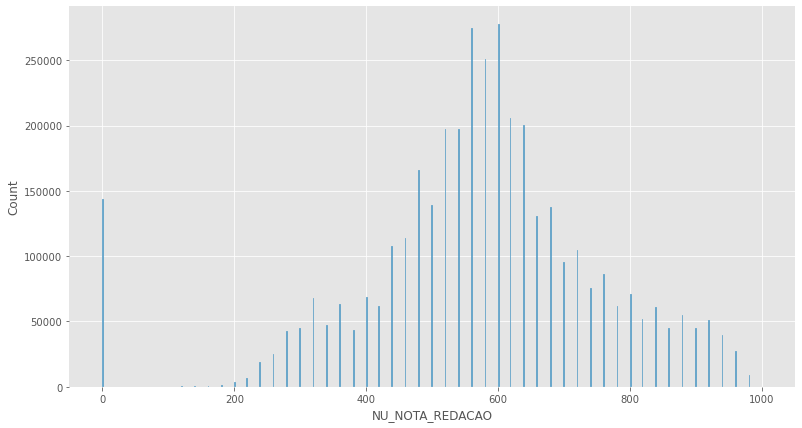

In [41]:
f, axes = plt.subplots(figsize=(13,7))
sns.histplot(x='NU_NOTA_REDACAO', data=df)
sns.despine(bottom=True, left=True)

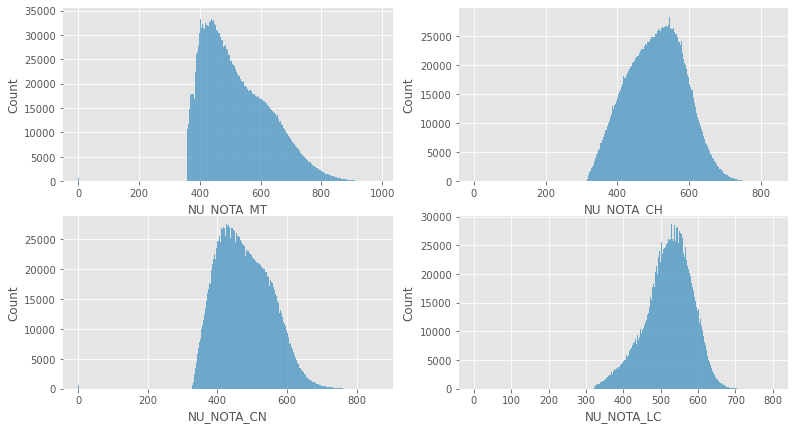

In [42]:
f, axes = plt.subplots(2, 2, figsize=(13,7))
sns.histplot(x='NU_NOTA_MT', data=df, ax=axes[0,0])
sns.histplot(x='NU_NOTA_CH', data=df, ax=axes[0,1])
sns.histplot(x='NU_NOTA_CN', data=df, ax=axes[1,0])
sns.histplot(x='NU_NOTA_LC', data=df, ax=axes[1,1])
sns.despine(bottom=True, left=True)

In [43]:
pd.set_option('max_columns', None)
df.groupby('SG_UF_PROVA')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].describe()

NU_NOTA_MT                                                 \
                 count        mean         std    min      25%    50%   
SG_UF_PROVA                                                             
AC             27482.0  482.116156   85.230168    0.0  416.300  463.2   
AL             67519.0  500.070733  100.786530    0.0  421.600  475.2   
AM             74905.0  481.220519   87.418012    0.0  415.100  460.4   
AP             29932.0  473.660808   83.532742    0.0  410.800  453.0   
BA            288126.0  500.686800   98.846212    0.0  423.300  477.8   
CE            222161.0  517.601354  109.094155    0.0  431.900  492.8   
DF             67738.0  536.323592  117.139645    0.0  440.500  515.2   
ES             72423.0  541.839598  112.038143    0.0  449.500  527.2   
GO            123892.0  523.178731  107.949788    0.0  436.400  502.1   
MA            163326.0  483.257099   89.429093    0.0  415.400  462.1   
MG            390853.0  546.986372  115.131985    0.0  451.900  531.6   
MS             48896.0  514.165375  104.536621    0.0  431.200  491.9   
MT             60483.0  505.137988  100.879384    0.0  425.400  482.9   
PA            206949.0  485.017648   90.057409    0.0  416.500  463.6   
PB            113727.0  510.199843  104.486123    0.0  428.200  486.2   
PE            205910.0  517.014922  104.967224    0.0  433.900  495.3   
PI             95317.0  499.222677  102.638284    0.0  421.200  473.6   
PR            151363.0  541.580450  110.312529    0.0  451.300  527.0   
RJ            245601.0  539.425426  113.006142    0.0  446.400  522.0   
RN             90721.0  518.540375  106.590260    0.0  432.700  496.7   
RO             40854.0  494.679446   91.281476    0.0  423.125  475.2   
RR              8832.0  498.542561   97.423620  359.0  421.600  476.1   
RS            156049.0  539.759411  108.247387    0.0  450.500  527.3   
SC             79998.0  548.266955  108.764257    0.0  459.200  538.6   
SE             59973.0  506.999616  103.521022    0.0  425.700  482.8   
SP            584108.0  551.574495  114.153565    0.0  456.500  539.6   
TO             33197.0  495.416044   95.899154    0.0  421.100  473.4   

                            NU_NOTA_CN                                         \
                 75%    max      count        mean        std    min      25%   
SG_UF_PROVA                                                                     
AC           531.100  924.4    27482.0  450.998461  64.812594    0.0  402.200   
AL           561.000  974.9    67519.0  458.798623  70.574255    0.0  404.850   
AM           527.800  973.4    74905.0  450.857779  66.439017    0.0  400.200   
AP           518.725  933.8    29932.0  450.196956  64.778131    0.0  400.600   
BA           562.300  974.3   288126.0  464.807021  71.557160    0.0  409.600   
CE           587.900  985.5   222161.0  468.265629  75.831554    0.0  409.300   
DF           618.200  985.5    67738.0  492.422524  81.424388    0.0  427.500   
ES           622.700  985.0    72423.0  488.971629  76.733517    0.0  428.300   
GO           596.300  985.5   123892.0  478.053879  77.659299    0.0  417.000   
MA           531.400  966.3   163326.0  450.585479  66.643897    0.0  400.000   
MG           630.100  985.5   390853.0  492.484325  78.014419    0.0  430.600   
MS           582.300  964.2    48896.0  474.768190  73.016289    0.0  418.375   
MT           568.800  984.2    60483.0  466.895719  71.378277    0.0  411.600   
PA           534.800  964.5   206949.0  457.248251  67.972561    0.0  405.200   
PB           576.400  985.5   113727.0  468.171509  73.271859    0.0  411.300   
PE           586.600  985.0   205910.0  470.119260  73.314068    0.0  412.900   
PI           554.900  985.5    95317.0  459.350496  72.587710    0.0  404.400   
PR           619.700  976.5   151363.0  492.625083  77.697219    0.0  431.600   
RJ           620.800  985.0   245601.0  491.795712  75.878850    0.0  431.900   
RN           592.200  985.0    90721.0 

<AxesSubplot:title={'center':'NOTA REDAÇÃO'}, xlabel='longitude', ylabel='latitude'>

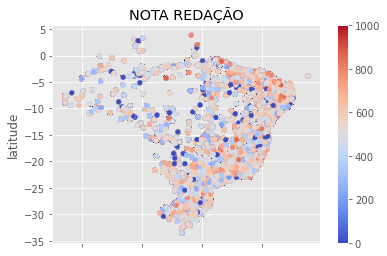

In [44]:
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_REDACAO, cmap="coolwarm",title='NOTA REDAÇÃO')

<AxesSubplot:title={'center':'NOTA LING. E CÓDIGOS'}, xlabel='longitude', ylabel='latitude'>

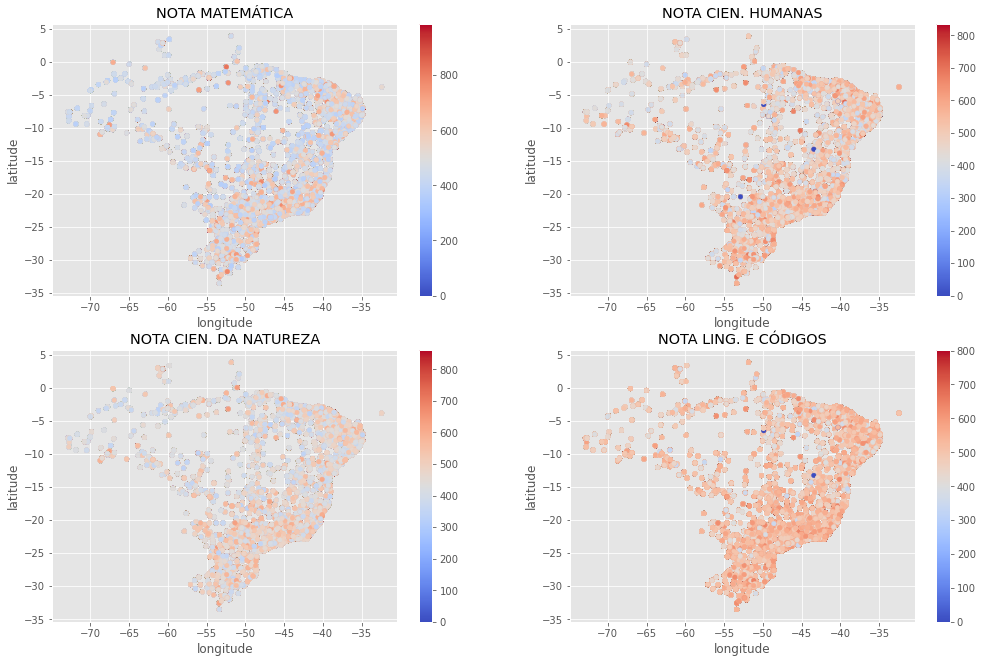

In [45]:
f, axes = plt.subplots(2, 2, figsize=(17,11))
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_MT, cmap='coolwarm', ax=axes[0,0], title='NOTA MATEMÁTICA')
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_CH, cmap='coolwarm', ax=axes[0,1], title='NOTA CIEN. HUMANAS')
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_CN, cmap='coolwarm', ax=axes[1,0], title='NOTA CIEN. DA NATUREZA')
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_LC, cmap='coolwarm', ax=axes[1,1], title='NOTA LING. E CÓDIGOS')

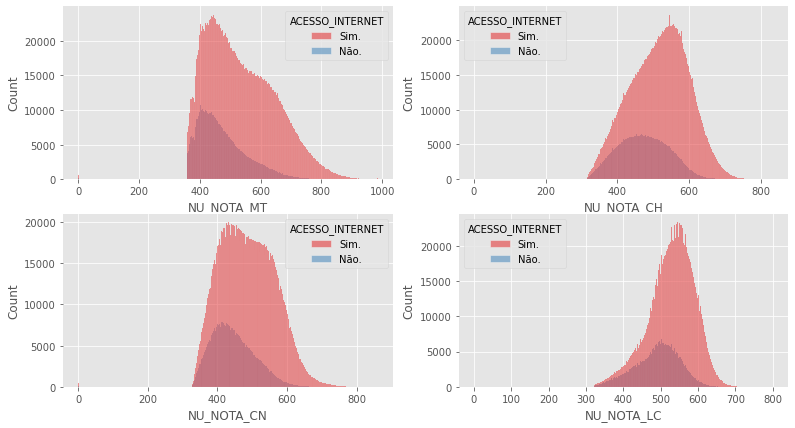

In [46]:
f, axes = plt.subplots(2, 2, figsize = (13,7))
sns.histplot(x='NU_NOTA_MT', hue='ACESSO_INTERNET', data=df,ax=axes[0,0], palette='Set1')
sns.histplot(x='NU_NOTA_CH', hue='ACESSO_INTERNET', data=df,ax=axes[0,1], palette='Set1')
sns.histplot(x='NU_NOTA_CN', hue='ACESSO_INTERNET', data=df,ax=axes[1,0], palette='Set1')
sns.histplot(x='NU_NOTA_LC', hue='ACESSO_INTERNET', data=df,ax=axes[1,1], palette='Set1')
sns.despine(bottom=True, left=True)

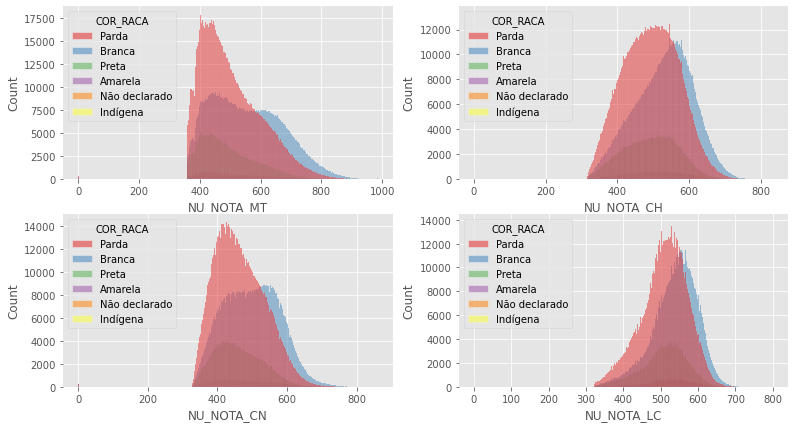

In [47]:
f, axes = plt.subplots(2, 2, figsize = (13,7))
sns.histplot(x='NU_NOTA_MT', hue='COR_RACA', data=df,ax=axes[0,0], palette='Set1')
sns.histplot(x='NU_NOTA_CH', hue='COR_RACA', data=df,ax=axes[0,1], palette='Set1')
sns.histplot(x='NU_NOTA_CN', hue='COR_RACA', data=df,ax=axes[1,0], palette='Set1')
sns.histplot(x='NU_NOTA_LC', hue='COR_RACA', data=df,ax=axes[1,1], palette='Set1')
sns.despine(bottom=True, left=True)

In [48]:
df.groupby('COR_RACA')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].describe()

NU_NOTA_MT                                                    \
                   count        mean         std  min    25%    50%    75%   
COR_RACA                                                                     
Amarela          84957.0  525.549803  114.224756  0.0  434.3  499.8  599.7   
Branca         1377694.0  555.981330  116.953347  0.0  458.2  544.6  642.1   
Indígena         21603.0  475.669088   83.441263  0.0  412.8  456.8  521.7   
Não declarado    73677.0  532.981499  117.098165  0.0  437.2  509.2  616.0   
Parda          1698103.0  504.366300   99.214745  0.0  426.4  482.5  567.1   
Preta           454301.0  493.800255   91.131568  0.0  422.7  474.4  550.4   

                     NU_NOTA_CN                                            \
                 max      count        mean        std  min    25%    50%   
COR_RACA                                                                    
Amarela        985.5    84957.0  477.347951  78.445449  0.0  416.3  467.3   
Branca         985.5  1377694.0  499.296729  79.397601  0.0  436.3  499.0   
Indígena       885.6    21603.0  444.131051  62.657491  0.0  396.8  434.6   
Não declarado  985.5    73677.0  486.548931  82.346708  0.0  420.1  479.4   
Parda          985.0  1698103.0  464.964260  70.995418  0.0  410.1  456.1   
Preta          985.0   454301.0  461.047321  67.348133  0.0  409.2  453.5   

                            NU_NOTA_CH                                     \
                 75%    max      count        mean        std  min    25%   
COR_RACA                                                                    
Amarela        531.3  815.3    89826.0  502.410703  81.944344  0.0  443.6   
Branca         558.8  853.5  1450775.0  529.261393  82.697595  0.0  473.3   
Indígena       483.9  745.4    23323.0  468.774291  74.024527  0.0  416.0   
Não declarado  548.5  816.7    78154.0  515.252251  89.979047  0.0  449.8   
Parda          514.2  860.9  1798211.0  493.773780  79.139995  0.0  436.4   
Preta          508.0  812.6   482757.0  492.745154  77.816500  0.0  436.6   

                                    NU_NOTA_LC                              \
                 50%     75%    max      count        mean        std  min   
COR_RACA                                                                     
Amarela        503.7  560.40  798.3    89826.0  518.429190  63.168277  0.0   
Branca         536.8  588.00  835.1  1450775.0  538.369340  61.688260  0.0   
Indígena       466.0  520.25  723.2    23323.0  485.667706  64.903863  0.0   
Não declarado  519.0  581.20  809.4    78154.0  525.037356  69.680674  0.0   
Parda          494.8  550.80  822.7  1798211.0  509.535740  63.117202  0.0   
Preta          495.5  549.50  802.2   482757.0  509.116492  61.929512  0.0   

                                          NU_NOTA_REDACAO              \
                 25%    50%    75%    max           count        mean   
COR_RACA                                                                
Amarela        482.7  523.1  561.4  801.7         89826.0  567.901944   
Branca         504.0  545.3  580.9  801.7       1450775.0  607.321673   
Indígena       444.0  492.0  530.9  695.9         23323.0  489.876946   
Não declarado  483.1  531.5  575.5  755.3         78154.0  566.532231   
Parda          472.4  514.9  553.0  801.7       1798211.0  551.188320   
Preta          473.9  515.3  551.6  741.4        482756.0  542.368774   

                                                             
                      std  min    25%    50%    75%     max  
COR_RACA                                                     
Amarela        188.449806  0.0  480.0  580.0  680.0  1000.0  
Branca         185.950497  0.0  520.0  600.0  720.0  1000.0  
Indígena       195.570794  0.0  400.0  520.0  600.0   980.0  
Não declarado  202.178239  0.0  480.0  580.0  680.0  1000.0  
Parda          187.716570  0.0  480.0  560.0  640.0  1000.0  
Preta          180.956450  0.0  460.0  560.0  640.0  1000.0

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='RENDA_FAMILIAR'>

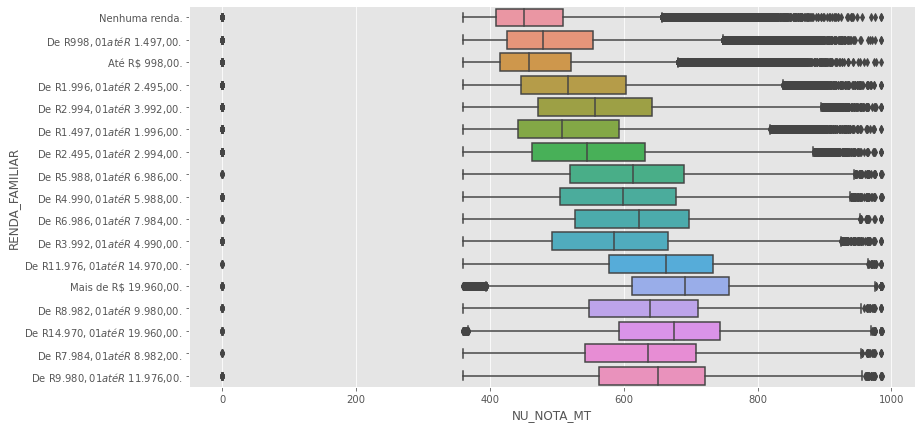

In [49]:
f, axes = plt.subplots(figsize = (13,7))
sns.boxplot(x='NU_NOTA_MT', data=df, y='RENDA_FAMILIAR')

In [50]:
df.groupby('RENDA_FAMILIAR')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                             'NU_NOTA_REDACAO']].describe()

NU_NOTA_MT                               \
                                       count        mean         std  min   
RENDA_FAMILIAR                                                              
Até R$ 998,00.                      894721.0  475.844634   80.562586  0.0   
De R$ 1.497,01 até R$ 1.996,00.     357511.0  521.587688   99.414742  0.0   
De R$ 1.996,01 até R$ 2.495,00.     346591.0  529.590103  101.735224  0.0   
De R$ 11.976,01 até R$ 14.970,00.    42032.0  652.509597  115.270878  0.0   
De R$ 14.970,01 até R$ 19.960,00.    36194.0  664.477181  115.009731  0.0   
De R$ 2.495,01 até R$ 2.994,00.     172540.0  552.229871  107.619595  0.0   
De R$ 2.994,01 até R$ 3.992,00.     234688.0  561.241434  108.827369  0.0   
De R$ 3.992,01 até R$ 4.990,00.     155081.0  583.293662  112.486333  0.0   
De R$ 4.990,01 até R$ 5.988,00.     118191.0  594.105914  114.550037  0.0   
De R$ 5.988,01 até R$ 6.986,00.      66896.0  606.986144  114.792824  0.0   
De R$ 6.986,01 até R$ 7.984,00.      48643.0  614.089137  115.413094  0.0   
De R$ 7.984,01 até R$ 8.982,00.      36886.0  624.843914  115.101879  0.0   
De R$ 8.982,01 até R$ 9.980,00.      36202.0  628.863712  115.556944  0.0   
De R$ 9.980,01 até R$ 11.976,00.     51817.0  640.576984  114.862951  0.0   
De R$ 998,01 até R$ 1.497,00.       906912.0  496.684799   90.186276  0.0   
Mais de R$ 19.960,00.                46815.0  679.419609  114.254667  0.0   
Nenhuma renda.                      158615.0  468.448352   79.112207  0.0   

                                                                NU_NOTA_CN  \
                                     25%    50%      75%    max      count   
RENDA_FAMILIAR                                                               
Até R$ 998,00.                     414.4  458.4  521.000  984.2   894721.0   
De R$ 1.497,01 até R$ 1.996,00.    441.1  507.0  592.300  985.0   357511.0   
De R$ 1.996,01 até R$ 2.495,00.    446.5  516.4  603.200  985.0   346591.0   
De R$ 11.976,01 até R$ 14.970,00.  578.5  663.3  733.200  985.0    42032.0   
De R$ 14.970,01 até R$ 19.960,00.  593.1  675.2  743.900  985.5    36194.0   
De R$ 2.495,01 até R$ 2.994,00.    463.5  545.7  631.500  985.0   172540.0   
De R$ 2.994,01 até R$ 3.992,00.    472.3  557.6  641.600  985.0   234688.0   
De R$ 3.992,01 até R$ 4.990,00.    493.1  585.8  665.500  984.7   155081.0   
De R$ 4.990,01 até R$ 5.988,00.    504.0  599.0  678.000  985.5   118191.0   
De R$ 5.988,01 até R$ 6.986,00.    519.5  614.0  689.600  985.5    66896.0   
De R$ 6.986,01 até R$ 7.984,00.    526.7  623.2  697.100  985.0    48643.0   
De R$ 7.984,01 até R$ 8.982,00.    542.4  635.5  707.100  985.0    36886.0   
De R$ 8.982,01 até R$ 9.980,00.    547.5  639.4  710.975  985.0    36202.0   
De R$ 9.980,01 até R$ 11.976,00.   563.3  650.8  721.500  985.5    51817.0   
De R$ 998,01 até R$ 1.497,00.      425.8  479.0  554.500  984.2   906912.0   
Mais de R$ 19.960,00.              612.3  691.0  757.700  985.5    46815.0   
Nenhuma renda.                     409.6  450.2  508.500  985.0   158615.0   

                                                                             \
                                         mean        std  min    25%    50%   
RENDA_FAMILIAR                                                                
Até R$ 998,00.                     445.353186  60.931339  0.0  399.3  437.6   
De R$ 1.497,01 até R$ 1.996,00.    477.666576  70.122652  0.0  423.3  474.0   
De R$ 1.996,01 até R$ 2.495,00.    483.433526  71.348652  0.0  427.7  481.0   
De R$ 11.976,01 até R$ 14.970,00.  560.285899  74.924152  0.0  519.8  568.9   
De R$ 14.970,01 até R$ 19.960,00.  566.896488  74.129731  0.0  528.5  575.0   
De R$ 2.495,01 até R$ 2.994,00.    497.023781  74.468900  0.0  439.4  498.2   
De R$ 2.994,01 até R$ 3.992,00.    503.285064  74.880648  0.0  445.6  506.6   
De R$ 3.992,01 até R$ 4.990,00.    517.774880  76.275863  0.0  461.7  524.8   
De R$ 4.990,01 até R$ 5.988,00.    524.509277  77.048652  0.0  

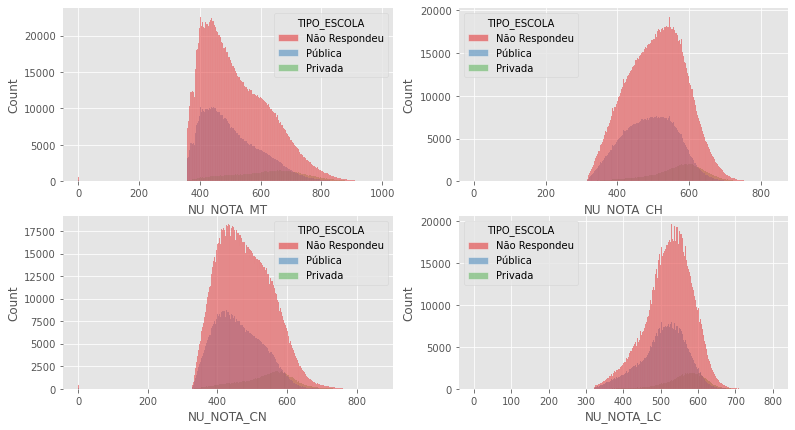

In [51]:
f, axes = plt.subplots(2, 2, figsize = (13,7))
sns.histplot(x='NU_NOTA_MT', hue='TIPO_ESCOLA', data=df,ax=axes[0,0], palette='Set1')
sns.histplot(x='NU_NOTA_CH', hue='TIPO_ESCOLA', data=df,ax=axes[0,1], palette='Set1')
sns.histplot(x='NU_NOTA_CN', hue='TIPO_ESCOLA', data=df,ax=axes[1,0], palette='Set1')
sns.histplot(x='NU_NOTA_LC', hue='TIPO_ESCOLA', data=df,ax=axes[1,1], palette='Set1')
sns.despine(bottom=True, left=True)

In [52]:
df.groupby('TIPO_ESCOLA')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].describe()

NU_NOTA_MT                                                    \
                   count        mean         std  min    25%    50%    75%   
TIPO_ESCOLA                                                                  
Não Respondeu  2491200.0  522.746365  109.481240  0.0  434.2  500.6  597.9   
Privada         207424.0  619.761302  117.230067  0.0  531.6  628.9  705.0   
Pública        1011711.0  504.241229   94.969313  0.0  429.5  485.1  565.6   

                     NU_NOTA_CN                                            \
                 max      count        mean        std  min    25%    50%   
TIPO_ESCOLA                                                                 
Não Respondeu  985.5  2491200.0  479.563489  76.389980  0.0  419.6  472.3   
Privada        985.5   207424.0  540.502828  75.454066  0.0  492.3  551.5   
Pública        985.0  1011711.0  460.688704  67.782057  0.0  407.7  452.8   

                            NU_NOTA_CH                                     \
                 75%    max      count        mean        std  min    25%   
TIPO_ESCOLA                                                                 
Não Respondeu  534.6  860.9  2645513.0  509.138659  82.881243  0.0  449.8   
Privada        592.9  860.9   210571.0  567.778933  75.807386  0.0  526.4   
Pública        509.4  842.8  1066962.0  490.613429  76.134832  0.0  435.6   

                                   NU_NOTA_LC                              \
                 50%    75%    max      count        mean        std  min   
TIPO_ESCOLA                                                                 
Não Respondeu  512.9  568.6  835.1  2645513.0  522.200099  63.754821  0.0   
Privada        578.7  619.8  808.5   210571.0  565.608902  54.169989  0.0   
Pública        492.9  546.5  835.1  1066962.0  507.446879  62.407227  0.0   

                                          NU_NOTA_REDACAO              \
                 25%    50%    75%    max           count        mean   
TIPO_ESCOLA                                                             
Não Respondeu  485.6  527.7  566.4  801.7       2645513.0  569.750109   
Privada        537.3  573.3  601.9  801.7        210571.0  722.038172   
Pública        471.2  514.1  551.1  749.6       1066961.0  544.972759   

                                                             
                      std  min    25%    50%    75%     max  
TIPO_ESCOLA                                                  
Não Respondeu  184.599471  0.0  480.0  580.0  660.0  1000.0  
Privada        159.678109  0.0  620.0  720.0  840.0  1000.0  
Pública        190.534125  0.0  460.0  560.0  640.0  1000.0

In [53]:
df.groupby('SERIE_MAE')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].describe()

NU_NOTA_MT              \
                                                        count        mean   
SERIE_MAE                                                                   
Completou a 4ª série/5º ano, mas não completou ...   472909.0  495.996486   
Completou a 8ª série/9º ano do Ensino Fundament...   476839.0  504.998550   
Completou a Faculdade, mas não completou a Pós-...   417201.0  583.241671   
Completou a Pós-graduação.                           333915.0  598.864595   
Completou o Ensino Médio, mas não completou a F...  1237237.0  528.265679   
Nunca estudou.                                       121357.0  459.829239   
Não completou a 4ª série/5º ano do Ensino Funda...   552869.0  480.021420   
Não sei.                                              98008.0  484.859628   

                                                                            \
                                                           std  min    25%   
SERIE_MAE                                                                    
Completou a 4ª série/5º ano, mas não completou ...   91.845400  0.0  424.0   
Completou a 8ª série/9º ano do Ensino Fundament...   95.328537  0.0  429.8   
Completou a Faculdade, mas não completou a Pós-...  120.622917  0.0  483.4   
Completou a Pós-graduação.                          122.162424  0.0  499.4   
Completou o Ensino Médio, mas não completou a F...  105.184998  0.0  442.7   
Nunca estudou.                                       75.272885  0.0  403.8   
Não completou a 4ª série/5º ano do Ensino Funda...   84.340753  0.0  415.1   
Não sei.                                             92.075390  0.0  415.2   

                                                                         \
                                                      50%    75%    max   
SERIE_MAE                                                                 
Completou a 4ª série/5º ano, mas não completou ...  476.8  553.9  984.2   
Completou a 8ª série/9º ano do Ensino Fundament...  486.1  567.3  985.5   
Completou a Faculdade, mas não completou a Pós-...  582.2  672.7  985.5   
Completou a Pós-graduação.                          603.3  689.4  985.5   
Completou o Ensino Médio, mas não completou a F...  511.2  602.7  985.5   
Nunca estudou.                                      441.9  498.3  921.4   
Não completou a 4ª série/5º ano do Ensino Funda...  461.1  528.9  985.5   
Não sei.                                            462.6  535.5  985.0   

                                                   NU_NOTA_CN              \
                                                        count        mean   
SERIE_MAE                                                                   
Completou a 4ª série/5º ano, mas não completou ...   472909.0  459.608158   
Completou a 8ª série/9º ano do Ensino Fundament...   476839.0  464.874488   
Completou a Faculdade, mas não completou a Pós-...   417201.0  517.095697   
Completou a Pós-graduação.                           333915.0  527.127410   
Completou o Ensino Médio, mas não completou a F...  1237237.0  480.822043   
Nunca estudou.                                       121357.0  440.725548   
Não completou a 4ª série/5º ano do Ensino Funda...   552869.0  451.385658   
Não sei.                                              98008.0  450.788208   

                                                                           \
                                                          std  min    25%   
SERIE_MAE                                                                   
Completou a 4ª série/5º ano, mas não completou ...  66.435576  0.0  408.7   
Completou a 8ª série/9º ano do Ensino Fundament...  68.820389  0.0  411.5   
Completou a Faculdade, mas não completou a Pós-...  81.259563  0.0  454.3   
Completou a Pós-graduação.                          81.828148  0.0  466.3   
Completou o Ensino Médio, mas não completou a F...  74.192217  0.0  422.2   
Nunca estudou.                                      57

In [54]:
df.groupby('SERIE_PAI')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].describe()

NU_NOTA_MT              \
                                                        count        mean   
SERIE_PAI                                                                   
Completou a 4ª série/5º ano, mas não completou ...   516863.0  505.345008   
Completou a 8ª série/9º ano do Ensino Fundament...   434133.0  515.697645   
Completou a Faculdade, mas não completou a Pós-...   308998.0  600.193611   
Completou a Pós-graduação.                           194055.0  624.026500   
Completou o Ensino Médio, mas não completou a F...  1008223.0  538.876960   
Nunca estudou.                                       186674.0  466.054692   
Não completou a 4ª série/5º ano do Ensino Funda...   754350.0  486.408198   
Não sei.                                             307039.0  495.394581   

                                                                            \
                                                           std  min    25%   
SERIE_PAI                                                                    
Completou a 4ª série/5º ano, mas não completou ...   96.037753  0.0  429.3   
Completou a 8ª série/9º ano do Ensino Fundament...  100.185947  0.0  435.5   
Completou a Faculdade, mas não completou a Pós-...  120.653772  0.0  503.6   
Completou a Pós-graduação.                          122.617313  0.0  531.3   
Completou o Ensino Médio, mas não completou a F...  108.552627  0.0  449.6   
Nunca estudou.                                       78.364069  0.0  407.2   
Não completou a 4ª série/5º ano do Ensino Funda...   87.424110  0.0  418.6   
Não sei.                                             93.619270  0.0  422.7   

                                                                         \
                                                      50%    75%    max   
SERIE_PAI                                                                 
Completou a 4ª série/5º ano, mas não completou ...  486.3  568.4  984.2   
Completou a 8ª série/9º ano do Ensino Fundament...  497.3  584.0  985.0   
Completou a Faculdade, mas não completou a Pós-...  605.0  688.8  985.5   
Completou a Pós-graduação.                          634.1  713.0  985.5   
Completou o Ensino Médio, mas não completou a F...  524.5  617.6  985.5   
Nunca estudou.                                      447.4  507.1  953.0   
Não completou a 4ª série/5º ano do Ensino Funda...  467.1  538.8  985.0   
Não sei.                                            474.6  552.7  985.0   

                                                   NU_NOTA_CN              \
                                                        count        mean   
SERIE_PAI                                                                   
Completou a 4ª série/5º ano, mas não completou ...   516863.0  465.179765   
Completou a 8ª série/9º ano do Ensino Fundament...   434133.0  471.885116   
Completou a Faculdade, mas não completou a Pós-...   308998.0  528.815727   
Completou a Pós-graduação.                           194055.0  543.568667   
Completou o Ensino Médio, mas não completou a F...  1008223.0  488.201472   
Nunca estudou.                                       186674.0  442.275014   
Não completou a 4ª série/5º ano do Ensino Funda...   754350.0  454.374634   
Não sei.                                             307039.0  459.780736   

                                                                           \
                                                          std  min    25%   
SERIE_PAI                                                                   
Completou a 4ª série/5º ano, mas não completou ...  68.933648  0.0  411.8   
Completou a 8ª série/9º ano do Ensino Fundament...  71.585722  0.0  415.8   
Completou a Faculdade, mas não completou a Pós-...  80.174753  0.0  471.1   
Completou a Pós-graduação.                          80.238220  0.0  491.6   
Completou o Ensino Médio, mas não completou a F...  75.725481  0.0  428.0   
Nunca estudou.                                      59